# Forecast - SARIMAX

## Libraries and Data

In [2]:
# Libraries
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [4]:
# Data
df = pd.read_csv('../Data/nyc-data.csv', index_col=0, parse_dates=True)
future_df = pd.read_csv('../Data/future.csv', index_col=0, parse_dates=True)
future_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2021-01-01,NaN,0,0,0,5.00,154.221
2021-01-02,NaN,0,0,0,11.11,264.805
2021-01-03,NaN,0,0,0,3.89,115.499
2021-01-04,NaN,0,0,0,6.67,124.650
2021-01-05,NaN,0,0,0,5.56,77.968


In [5]:
# Rename variable
df = df.rename(columns={'Demand': 'y'})
df.head(1)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305


In [6]:
# Extract regressors
train_X = df.iloc[:, 1:]
future_X = future_df.iloc[:, 1:]
future_X.head(1)

,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,
2021-01-01,0,0,0,5.0,154.221


## SARIMAX model

In [8]:
# Get best parameters
parameters = pd.read_csv('best-params-SARIMAX.csv', index_col=0)
parameters

,31
D,1.000000
P,1.000000
Q,1.000000
d,1.000000
p,1.000000
q,1.000000
rmse,59.955212


In [11]:
# Store the individual parameters
p = parameters.loc['p'][0]
d = parameters.loc['d'][0]
q = parameters.loc['q'][0]
P = parameters.loc['P'][0]
D = parameters.loc['D'][0]
Q = parameters.loc['Q'][0]

In [13]:
# Model
model = pm.ARIMA(order=(p, d, q),
                 seasonal_order=(P, D, Q, 7),
                 X=train_X,
                 suppress_warnings=True,
                 force_stationarity=False)
model.fit(df.y)

ARIMA(order=(1.0, 1.0, 1.0), seasonal_order=(1.0, 1.0, 1.0, 7),
      suppress_warnings=True)

## Forecasting

In [16]:
# Predictions
predictions_sarimax = pd.Series(model.predict(n_periods=len(future_df),
                                      X=future_X)).rename('sarimax')
predictions_sarimax.index = future_df.index
predictions_sarimax

Date
2021-01-01    739.874432
2021-01-02    856.312084
2021-01-03    767.567530
2021-01-04    907.626374
2021-01-05    779.803536
2021-01-06    926.955663
2021-01-07    822.041158
2021-01-08    738.456697
2021-01-09    853.690317
2021-01-10    772.663628
2021-01-11    902.978208
2021-01-12    776.464312
2021-01-13    931.365572
2021-01-14    824.678396
2021-01-15    738.851949
2021-01-16    854.017405
2021-01-17    773.428101
2021-01-18    903.190593
2021-01-19    776.750928
2021-01-20    932.091346
2021-01-21    825.303783
2021-01-22    739.350357
2021-01-23    854.512011
2021-01-24    773.947552
2021-01-25    903.678821
2021-01-26    777.243424
2021-01-27    932.608786
2021-01-28    825.815596
2021-01-29    739.855036
2021-01-30    855.016535
2021-01-31    774.453544
Name: sarimax, dtype: float64

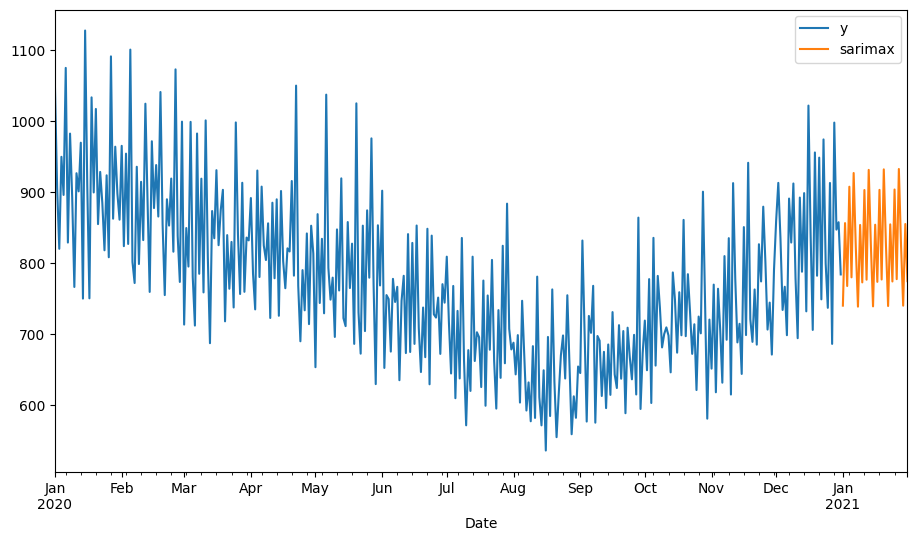

In [24]:
# Visualization
df['y']['2020-01-01':].plot(figsize=(11, 6),
             legend=True)
predictions_sarimax.plot(legend=True);

In [25]:
# Exporting
predictions_sarimax.to_csv('Ensemble/predictions-sarimax.csv')